In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorly
from tensorly.decomposition import parafac as cp
from scipy.io import loadmat
import tensorly as tl
%matplotlib inline

In [2]:
mat = loadmat('neurondata.mat')

In [3]:
t1 = mat["input"]
t1.shape

(500, 50, 100)

/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/tensorly/backend/core.py:767: RuntimeWarning: invalid value encountered in sqrt
  S = np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, np.sqrt(S))
/home/jfftilton/anaconda3/envs/omsa/lib/python3.7/site-packages/tensorly/backend/core.py:768: RuntimeWarning: invalid value encountered in less_equal
  V = np.dot(matrix.T.conj(), U * np.where(np.abs(S) <= np.finfo(S.dtype).eps, 0, 1/S)[None, :])


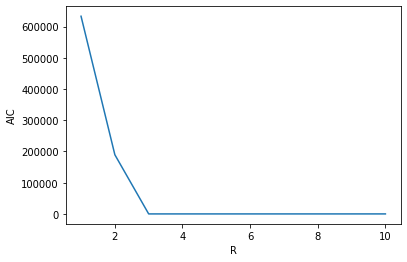

In [4]:
aic = []
for k in range(1,11):
    kt,e = cp(t1,k)
    reconstructed = tensorly.kruskal_to_tensor((kt,e))  
    err = ((t1-reconstructed)**2).sum()
    aic.append(2*err + 2*k)

plt.plot(np.arange(1,11),aic)
plt.xlabel('R')
plt.ylabel('AIC')
plt.show()   

In [5]:
# rank with min aic = 3
aic

[633032.3017958006,
 189482.49586025614,
 6.0000002359892965,
 8.000000006455842,
 10.000038815404233,
 12.000000000314909,
 14.000000000345404,
 16.00000000000092,
 18.0,
 20.0]

In [9]:
wf = cp(t1,3, normalize_factors=True)

In [10]:
# weights
wf[0]

array([687.32434465, 469.27524803, 347.52987662])

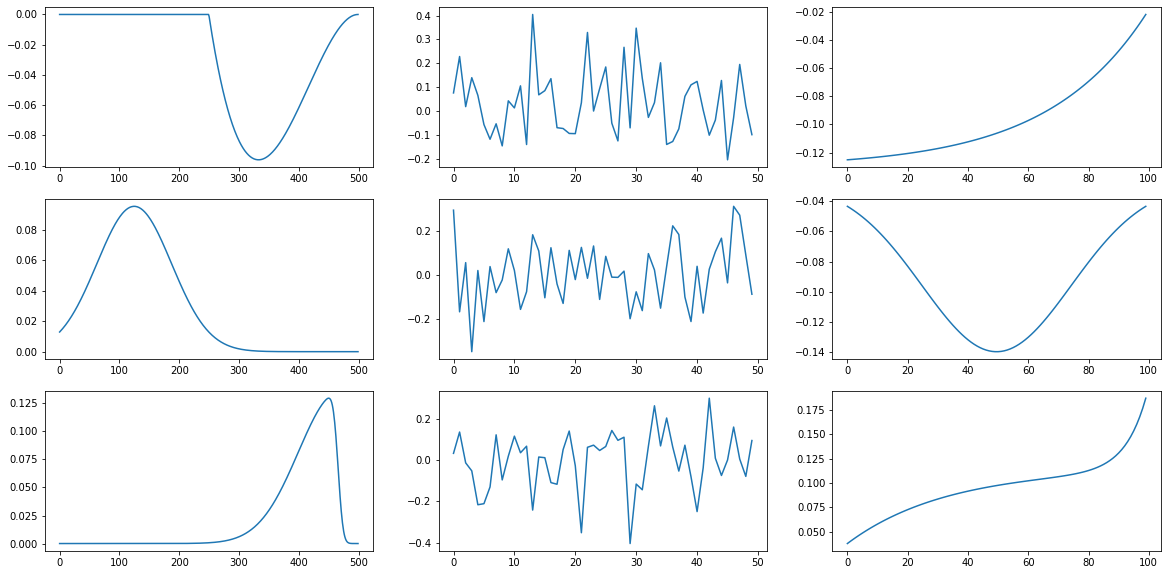

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(20,10))
a,b,c = wf[1]

for i in range(3):
    ax[i,0].plot(np.arange(0,a.shape[0]),a[:,i])
    ax[i,1].plot(np.arange(0,b.shape[0]),b[:,i])
    ax[i,2].plot(np.arange(0,c.shape[0]),c[:,i])

# Discussion

The first column above are the first three column vectors of the matrix corresponding to the temporal behavior of the neurons.  We can see that neural activity firing rates are increasing or decreasing with a wave pattern. <br />

The second column of plots shows the underlying behavior of the nerons, which shows neurons are either firing or not firing.<br />

The last column shows the general behavior of the neurons throughout the 100 trials.  